# End to End Heart Diease Classification
This notebook will use Python data science librariees to classify whether if a patient has heart disease or not.

## Steps:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

### 1. Problem Definition
Given clinical parameters of a patient, can we predict whether if he or she has heart disease or not.

### 2. Datta
Data from https://archive.ics.uci.edu/dataset/45/heart+disease

### 3. Evaluation
If a 95% accuracy of predicting whether if a patient has heart diesase, then we'll pursue further

### 4. Features
See above link
s, 0=no) (= the predicted attribute)
### 5. Modelling 

### 6. Experimentation

# Preparing the Tools
We'll use some exploratory data analysis, metrics, evaluation, and models.

In [1]:
# Exploratory data analysis tools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation methods
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Load Data

In [2]:
df = pd.read_csv("./data/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Exploratory Data Analysis
- Investigate data, and become an export in it.
- What questions are you trying to solve?
- What kind of data do we have and how do we treat different types?
- What's missing from the data and how do we deal with it?
- Where are and what to do with outliers?
- How do we modify the features to get more out of the data?

In [4]:
# how many patients have heart disease? (1 = yes, 0 = no)
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

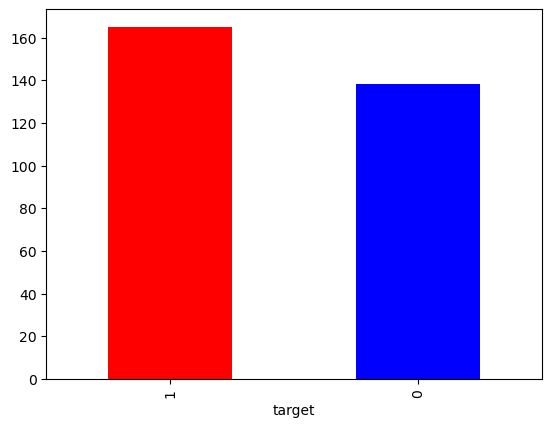

In [5]:
df["target"].value_counts().plot(kind="bar", color=["red","blue"]);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


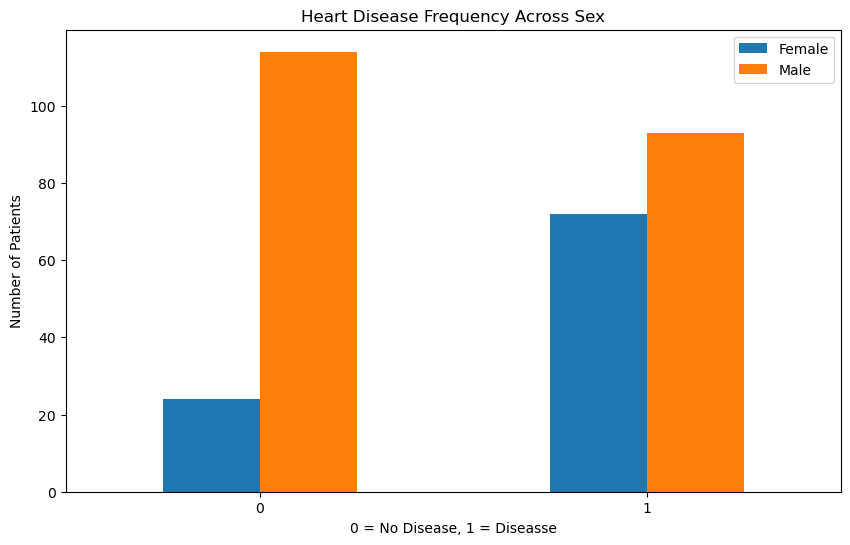

In [7]:
# Compare target to sex of patient
pd.crosstab(df["target"], df["sex"]).plot(kind="bar", figsize=(10,6))
plt.title("Heart Disease Frequency Across Sex")
plt.xlabel("0 = No Disease, 1 = Diseasse")
plt.ylabel("Number of Patients")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

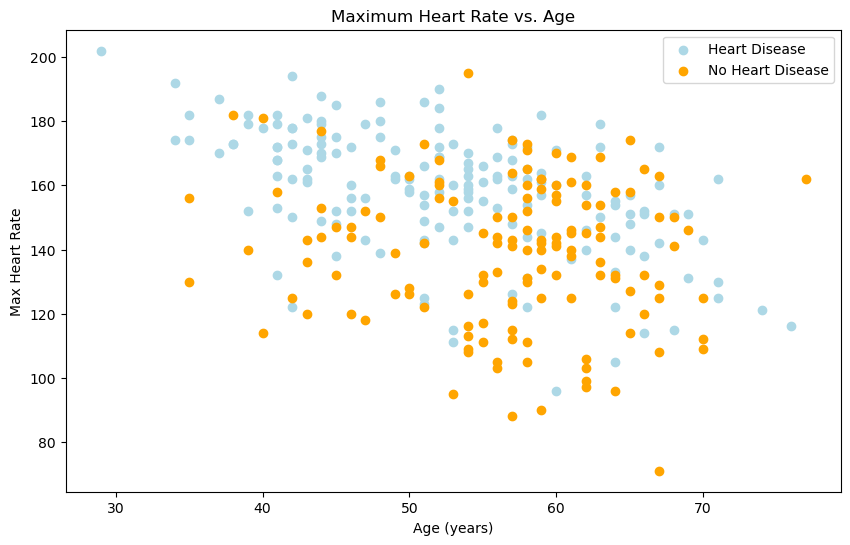

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(df["age"][df["target"]==1],
            df["thalach"][df["target"]==1],
           c="lightblue")
plt.scatter(df["age"][df["target"]==0],
            df["thalach"][df["target"]==0],
           c="orange")
plt.title("Maximum Heart Rate vs. Age")
plt.xlabel("Age (years)")
plt.ylabel("Max Heart Rate") 
plt.legend(["Heart Disease", "No Heart Disease"]);


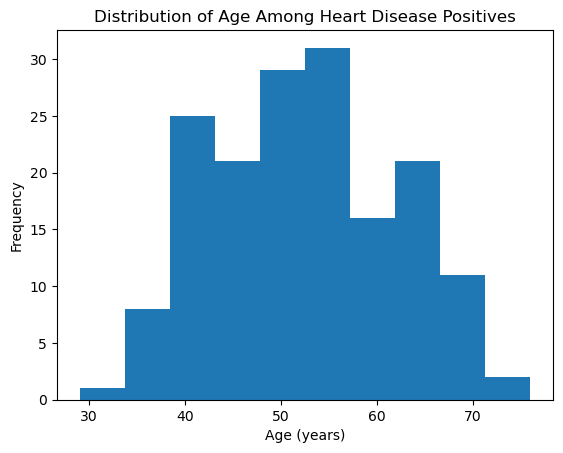

In [9]:
df["age"][df["target"]==1].plot.hist()
plt.title("Distribution of Age Among Heart Disease Positives")
plt.xlabel("Age (years)");

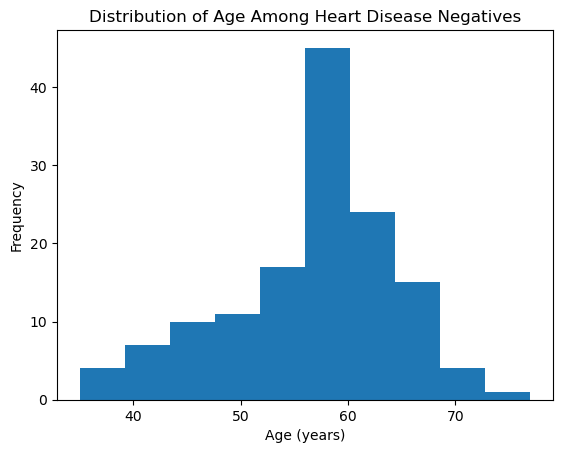

In [10]:
df["age"][df["target"]==0].plot.hist()
plt.title("Distribution of Age Among Heart Disease Negatives")
plt.xlabel("Age (years)");

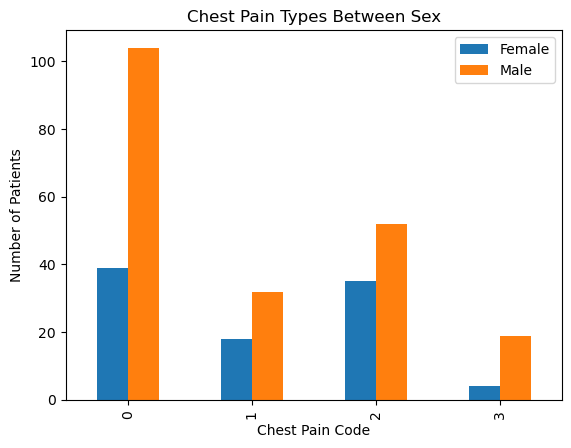

In [11]:
pd.crosstab(df["cp"], df["sex"]).plot(kind="bar")
plt.title("Chest Pain Types Between Sex")
plt.xlabel("Chest Pain Code")
plt.ylabel("Number of Patients")
plt.legend(["Female","Male"]);

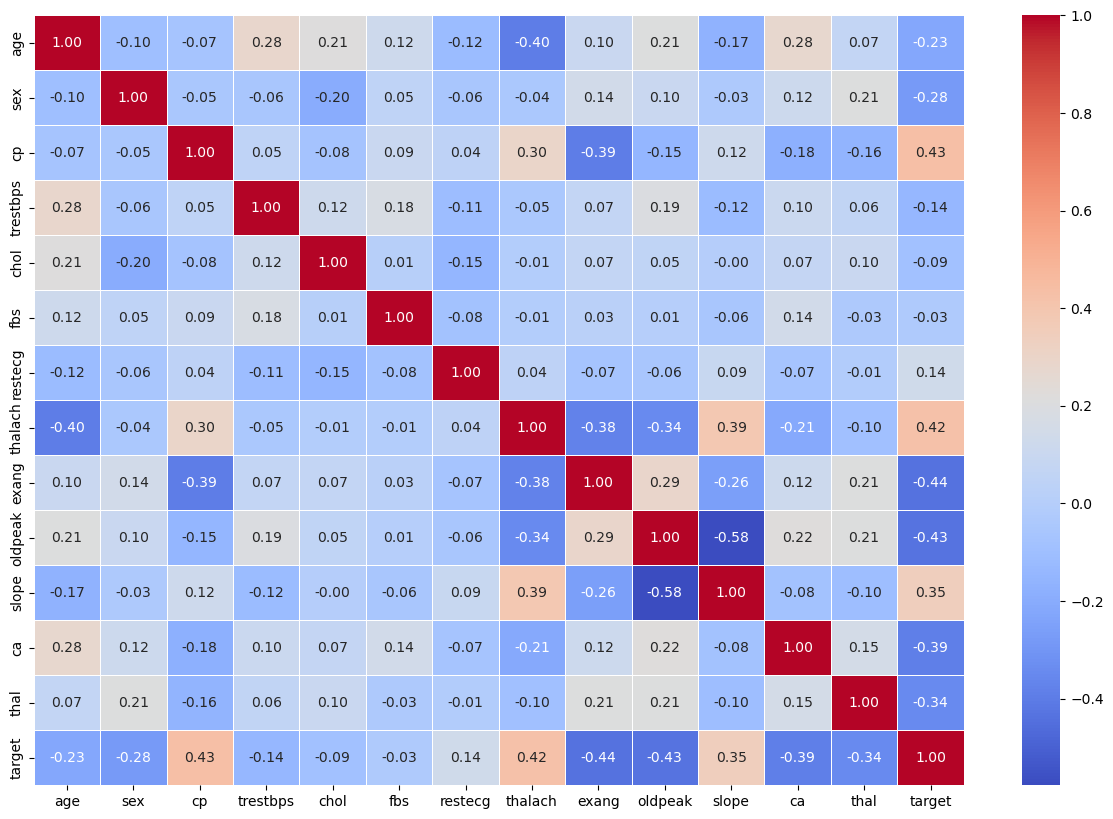

In [23]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10)) 
ax = sns.heatmap(corr_matrix, 
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="coolwarm")

# Modelling

In [27]:
X = df.drop("target", axis=1)
y = df["target"]

In [28]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Choosing ML Models

In [32]:
# use a dictionary to contain models
ml_models = {"K-Nearest Neighbours": KNeighborsClassifier(),
             "Logistic Regression": LogisticRegression(),
             "Random Forest Classifier": RandomForestClassifier()}
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    fits and evaluates a model from the `models` dictionary where:
    models: a dictionary of machine learning models 
    X_train: training data without labels
    X_test: testing data without labels
    y_train: training labels
    y_test: testing labels
    """
    np.random.seed(42)
    model_scores = {} 
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[model_name] = model.score(X_test, y_test)

    return model_scores
models_with_scores = fit_and_score(ml_models, X_train, X_test, y_train, y_test)
models_with_scores

C:\Users\gemst\Documents\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'K-Nearest Neighbours': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest Classifier': 0.8360655737704918}

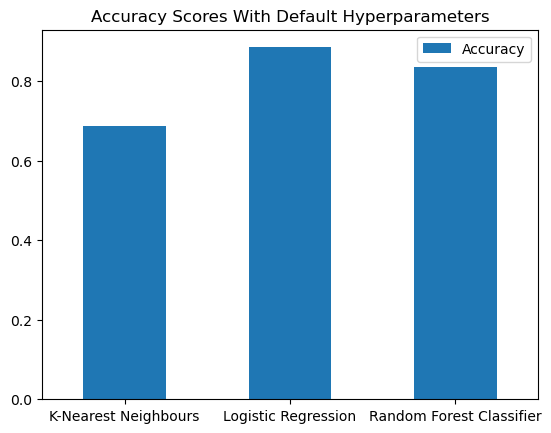

In [36]:
scores_df = pd.DataFrame(models_with_scores, index=["Accuracy"])
scores_df.T.plot(kind="bar")
plt.xticks(rotation=0)
plt.title("Accuracy Scores With Default Hyperparameters");


## Tune Hyperparameters

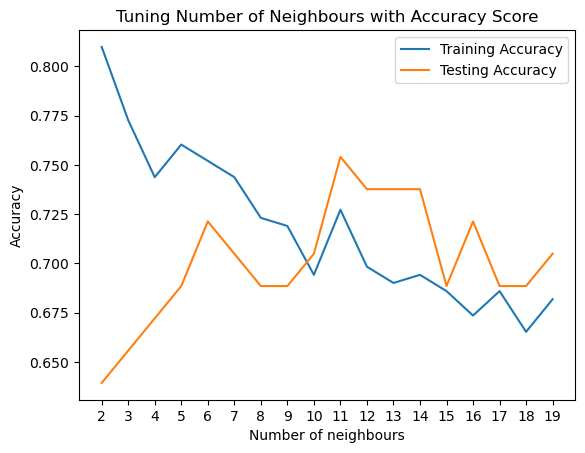

In [47]:
# Tuning KNN
train_scores = []
test_scores = []

n_neighbors = np.arange(2, 20, 1)

for i in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

plt.plot(n_neighbors, train_scores, label="Training Accuracy")
plt.plot(n_neighbors, test_scores, label="Testing Accuracy")
plt.title("Tuning Number of Neighbours with Accuracy Score")
plt.xlabel("Number of neighbours")
plt.ylabel("Accuracy")
plt.xticks(n_neighbors)
plt.legend();

### Tuning Logistic Regression Hyperparameters

In [48]:
log_regr_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}
rdm_frst_grid = {"n_estimators": np.arange(10, 1000, 30),
                "max_depth": [None, 3, 25, 50],
                "min_samples_leaf": np.arange(2, 30, 3),
                "min_samples_split": np.arange(2, 30, 3)}

In [56]:
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                                param_distributions=log_regr_grid,
                                cv=7,
                                n_iter=10,
                                verbose=True)
rs_log_reg.fit(X_train, y_train)

Fitting 7 folds for each of 10 candidates, totalling 70 fits


RandomizedSearchCV(cv=7, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [57]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [58]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

### Tuning Random Forest Classifier Hyperparameters

In [59]:
rs_rdm_frst = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                param_distributions=rdm_frst_grid,
                                cv=7,
                                n_iter=20,
                                verbose=True)
rs_rdm_frst.fit(X_train, y_train)

Fitting 7 folds for each of 20 candidates, totalling 140 fits


RandomizedSearchCV(cv=7, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 25, 50],
                                        'min_samples_leaf': array([ 2,  5,  8, 11, 14, 17, 20, 23, 26, 29]),
                                        'min_samples_split': array([ 2,  5,  8, 11, 14, 17, 20, 23, 26, 29]),
                                        'n_estimators': array([ 10,  40,  70, 100, 130, 160, 190, 220, 250, 280, 310, 340, 370,
       400, 430, 460, 490, 520, 550, 580, 610, 640, 670, 700, 730, 760,
       790, 820, 850, 880, 910, 940, 970])},
                   verbose=True)

In [60]:
rs_rdm_frst.best_params_

{'n_estimators': 160,
 'min_samples_split': 20,
 'min_samples_leaf': 26,
 'max_depth': 50}

In [62]:
rs_rdm_frst.score(X_test, y_test)

0.8688524590163934

In [65]:
gs_log_regr = GridSearchCV(estimator=LogisticRegression(),
                             param_grid=log_regr_grid,
                             cv=5,
                             verbose=True)
gs_log_regr.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [66]:
gs_log_regr.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [69]:
gs_log_regr.score(X_test, y_test)

0.8852459016393442